# Coordinate Reference Systems (CRS)

A CRS tells python how coordinates are related to places on the Earth. A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees). This transformation is used to represent the three dimensional earth on a flat, two dimensional map.

There is no perfect projection and we should know the strength and weaknesses of projection systems and choose a projection system that best fits our purpose.

We can reproject the geometries from crs to another using `to_crs()` function from GeoPandas.

We can define the coordinate system in different formats using `pyproj CRS`

### Import and view the data

In [2]:
import geopandas as gpd

In [22]:
# Read the data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [23]:
world.head(4)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."


### View the CRS of the data

In [24]:
# Check the CRS of the data.
# Lat Long data should have EPSG 4326 and WGS 84
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Change the CRS and visualize the data

Text(0.5, 1.0, 'Mercator')

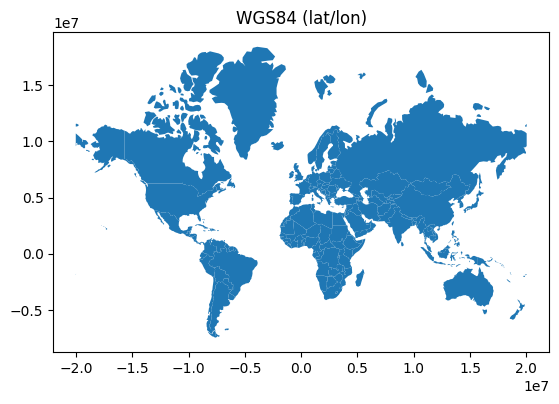

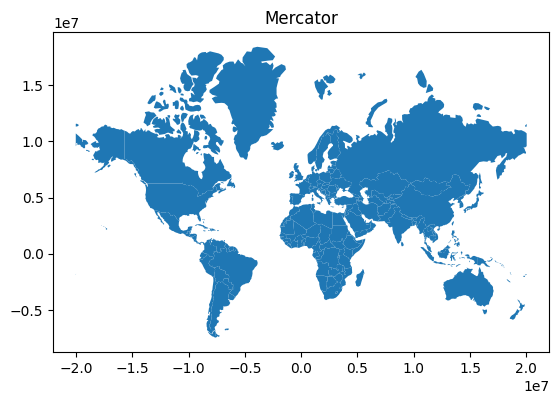

In [29]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)")
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
# Data in Mercator Projection
world = world.to_crs("EPSG:3395")
ax = world.plot()
ax.set_title("Mercator")

### Orthographic Projection

In [26]:
# Orthographic projection
from pyproj import CRS

Text(0.5, 1.0, 'Orthographic')

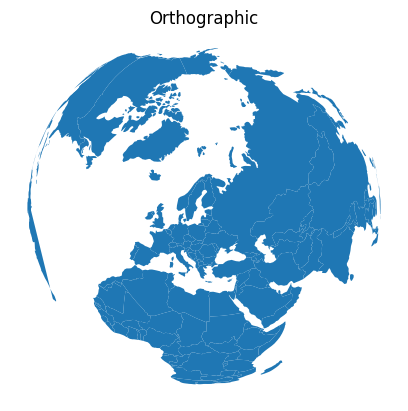

In [30]:
# Define an orthographic projection, from: http://www.statsmapsnpix.com/2019/09/globe-projections-and-insets-in-qgis.html
ortho = CRS.from_proj4(
    "+proj=ortho +lat_0=60.00 +lon_0=23.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs"
)

# Re-project and plot
ax = world.to_crs(ortho).plot()

# Remove x and y axis
ax.axis("off")
ax.set_title("Orthographic")